<a href="https://colab.research.google.com/github/KarimeAylen/inteligenciaIA.github.io/blob/main/entrenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys 
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [2]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 41.3 MB/s eta 0:00:00


In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import cv2
import os

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import tensorflow.keras.optimizers

In [9]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [10]:
from keras.preprocessing.image import ImageDataGenerator


In [11]:
from keras.optimizers import Adam
from tensorflow.python.keras import optimizers         #Optimizador con el que vamos a entrenar el modelo
from tensorflow.python.keras.models import Sequential  #Nos permite hacer redes neuronales secuenciales
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation #
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D  #Capas para hacer las convoluciones
from tensorflow.python.keras import backend as K       #Si hay una sesion de keras, lo cerramos para tener todo limp

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
K.clear_session()  #Limpiamos todo


In [14]:
datos_entrenamiento =__path__=r'/content/drive/MyDrive/fotos/Entrenamiento'
datos_validacion =__path__=r'/content/drive/MyDrive/fotos/Validacion'

In [15]:

#Parametros
iteraciones = 100  #Numero de iteraciones para ajustar nuestro modelo
altura, longitud = 200, 200 #Tamaño de las imagenes de entrenamiento
batch_size = 1  #Numero de imagenes que vamos a enviar
pasos = 10/1  # DEPENDIENDO   #Numero de veces que se va a procesar la informacion en cada iteracion
pasos_validacion = 10/1 #Despues de cada iteracion, validamos lo anterior
filtrosconv1 = 32
filtrosconv2 = 64     #Numero de filtros que vamos a aplicar en cada convolucion
filtrosconv3 = 128

filtrosconv4 = 160
filtrosconv5 = 180

tam_filtro1 = (160,160)
tam_filtro2 = (4,4)   #Tamaños de los filtros 1 y 2
tam_filtro3=(3,3)
tam_filtro4=(9,9)
tam_filtro5=(40,40)
tam_pool = (2,2)  #Tamaño del filtro en max pooling
clases = 20 #LETRAS SIN MOV  #Mano abierta y cerrada (5 dedos y 0 dedos)
lr = 0.0005  #ajustes de la red neuronal para acercarse a una solucion optima

In [16]:

#Pre-Procesamiento de las imagenes
preprocesamiento_entre = ImageDataGenerator(
    rescale= 1./255,   #Pasar los pixeles de 0 a 255 | 0 a 1
    shear_range = 0.3, #Generar nuestras imagenes inclinadas para un  mejor entrenamiento
    zoom_range = 0.3,  #Genera imagenes con zoom para un mejor entrenamiento
    horizontal_flip=True #Invierte las imagenes para mejor entrenamiento
)

preprocesamiento_vali = ImageDataGenerator(
    rescale = 1./255
)

imagen_entreno = preprocesamiento_entre.flow_from_directory(
    datos_entrenamiento,       #Va a tomar las fotos que ya almacenamos
    target_size = (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical',  #Clasificacion categorica = por clases
)

imagen_validacion = preprocesamiento_vali.flow_from_directory(
    datos_validacion,
    target_size=(altura,longitud),
    batch_size= batch_size,
    class_mode='categorical'
)

Found 140 images belonging to 20 classes.
Found 141 images belonging to 20 classes.


In [17]:

#Creamos la red neuronal convolucional (CNN)
cnn = Sequential()  #Red neuronal secuencial
#Agregamos filtros con el fin de volver nuestra imagen muy profunda pero pequeña
cnn.add(Convolution2D(filtrosconv1, tam_filtro1, padding = 'same', input_shape=(altura,longitud,3), activation = 'relu')) #Agregamos la primera capa   3
         #Es una convolucion y realizamos config
cnn.add(MaxPooling2D(pool_size=tam_pool)) #Despues de la primera capa vamos a tener una capa de max pooling y asignamos el tamaño

cnn.add(Convolution2D(filtrosconv2, tam_filtro2, padding = 'same', activation='relu')) #Agregamos nueva capa
cnn.add(MaxPooling2D(pool_size=tam_pool))
cnn.add(MaxPooling2D(pool_size=tam_pool))

#nuevo------------
cnn.add(Convolution2D(filtrosconv3, tam_filtro3,padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=tam_pool))
#-----------------------------------

cnn.add(Convolution2D(filtrosconv4, tam_filtro4,padding='same',activation='softmax'))
cnn.add(MaxPooling2D(pool_size=tam_pool))

#nuevo------------
cnn.add(Convolution2D(filtrosconv5, tam_filtro5,padding='same',activation='tanh'))
cnn.add(MaxPooling2D(pool_size=tam_pool))

#Ahora vamos a convertir esa imagen profunda a una plana, para tener 1 dimension con toda la info
cnn.add(Flatten())  #Aplanamos la imagen
cnn.add(Dense(5260,activation='relu'))  #Asignamos 256-2 neuronas regla de 3     2560
cnn.add(Dropout(0.5)) #Apagamos el 50% de las neuronas en la funcion anterior para no sobreajustar la red
cnn.add(Dense(clases, activation='softmax'))  #Es nuestra ultima capa, es la que nos dice la probabilidad de que 

In [18]:
#Agregamos parametros para optimizar el modelo
#Durante el entrenamiento tenga una autoevalucion, que se optimice con Adam, y la metrica sera accuracy
optimizar = Adam(learning_rate=lr)
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Entrenaremos nuestra red
history= cnn.fit(imagen_entreno, steps_per_epoch=pasos, epochs= iteraciones, validation_data= imagen_validacion, validation_steps=pasos_validacion)


Epoch 1/100
10/10 [==============================] - 23s 821ms/step - loss: 3.1323 - accuracy: 0.0000e+00 - val_loss: 3.1967 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 6s 659ms/step - loss: 3.7249 - accuracy: 0.0000e+00 - val_loss: 3.3942 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 6s 667ms/step - loss: 4.0782 - accuracy: 0.0000e+00 - val_loss: 3.4954 - val_accuracy: 0.1000
Epoch 4/100
10/10 [==============================] - 6s 643ms/step - loss: 3.8930 - accuracy: 0.0000e+00 - val_loss: 3.4516 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 6s 660ms/step - loss: 4.1844 - accuracy: 0.1000 - val_loss: 3.1494 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 6s 660ms/step - loss: 3.9957 - accuracy: 0.0000e+00 - val_loss: 3.3673 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 6s 637ms/step - loss: 3.4381 - accuracy: 0.0000e

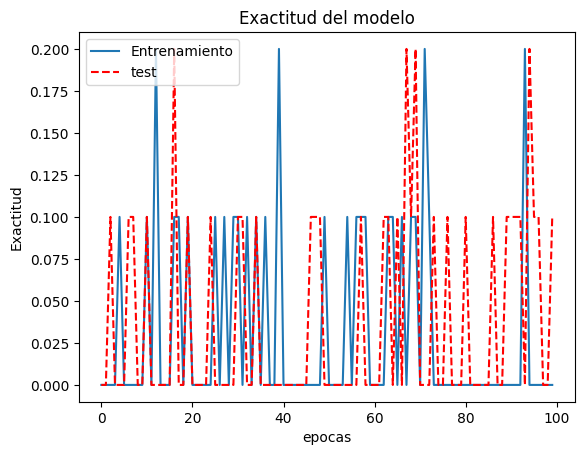

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

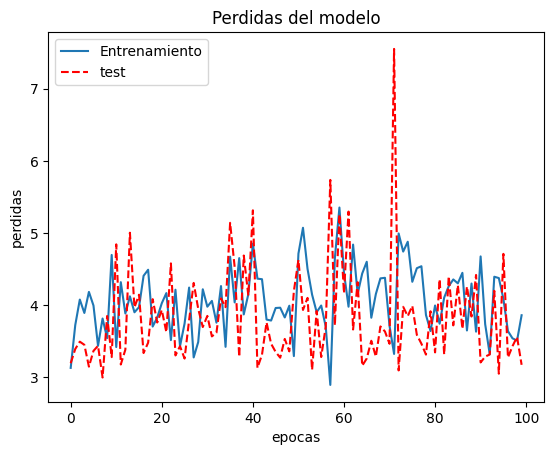

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [22]:
#Guardamos el modelo
cnn.save('/content/drive/MyDrive/fotos/modelo/modelo.h5')
cnn.save_weights('/content/drive/MyDrive/fotos/modelo/pesos.h5')